# K-Nearest Neighbors (k-NN)

This is a supervised ML algorithm which can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

Steps taken for this algorithm:
Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv("C:\Kaashika\ML_Project\Social_Network_Ads.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Fitting the knn classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [11]:
# Making the Confusion Matrix
'''
The four outcomes of a confusion matrix are:

True Positive (TP): The predicted class is positive and the actual class is also positive.
False Positive (FP): The predicted class is positive but the actual class is negative.
True Negative (TN): The predicted class is negative and the actual class is also negative.
False Negative (FN): The predicted class is negative but the actual class is positive.

order:
TP FP
FN TN

'''

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

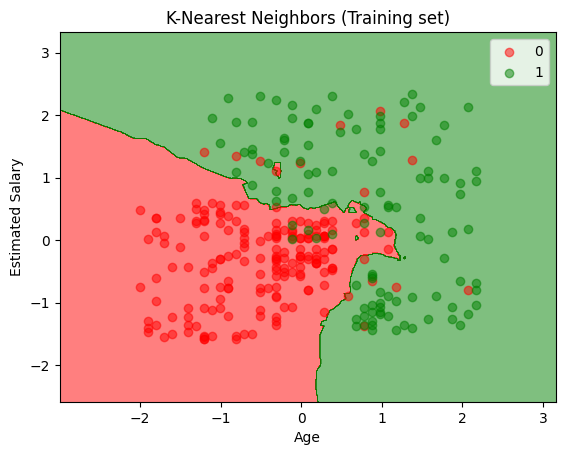

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.5,
                c = ('red', 'green')[i], label = j)
plt.title('K-Nearest Neighbors (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


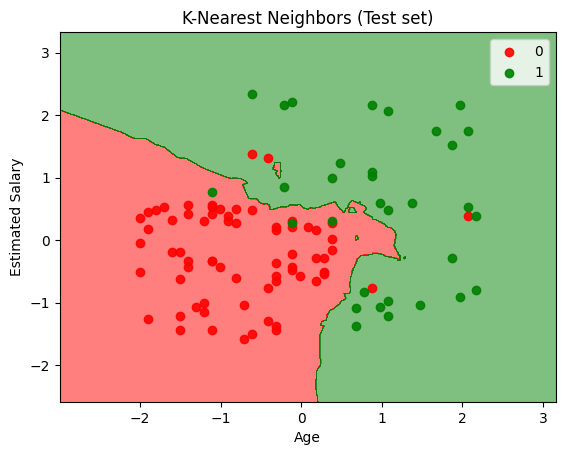

In [10]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], alpha=0.9,
                c = ('red', 'green')[i], label = j)
plt.title('K-Nearest Neighbors (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The above graph is showing the output for the test data set. As we can see in the graph, the predicted output is well good as most of the red points are in the red region and most of the green points are in the green region.

However, there are few green points in the red region and a few red points in the green region. These are the incorrect observations that we have observed in the confusion matrix(7 Incorrect output).